# Tarea: Ejercicios Prácticos Preparatorios para el Parcial 

## Ejemplo aplicado a data science (clase 05: estructura de datos)
Con el conocimiento que ahora poseemos respecto a listas, ciclo for y operaciones como "sum" sobre listas , podemos  ejecutar una simulación de monte carlo.

Se ha determinado que el tiempo "X" que los usuarios pasan en una red social diariamente se distribuye de forma normal(gausianna) con una media de 5 horas y desviacion estandar de 1.

Se ha estimado que el ingreso diario percibido "Y" por cada usuario depende del tiempo que este pasa en la red social  de manera proporcional siguiendo un modelo lineal de la forma:

$$y=0.1x+0.3±error$$

Donde :
* x: es el tiempo que un usuario pasa al día en la red social.
* error: es el posible error en la estimación del modelo que sigue una distribución normal centrada en 0 y std 0.1
* y: ingreso diario estimado

**nota** Este modelo posee un problema: puede llegar a generar ingresos negativos,por el momento no nos preocupemos por esto.

Se solicita el equipo de data science determinar cual sera el ingreso esperado(o promedio) diario para un usuario aleatorio y una estimación del valor máximo  que puede ser percibido.

**ejercicio** experimenta con diferentes numeros de iteraciones de la simulación y analiza el comportamiento del sistema en relación a esto, anota tu conclusión en el notebook en una nueva celda Markdown abajo de la celda de la simulación.

El valor esperado o esperanza de la variable Y es E(Y) = 0.799982096757309
El valor minimo de y es  0.1354690163769668
El valor maximo de y es  1.442010666021259


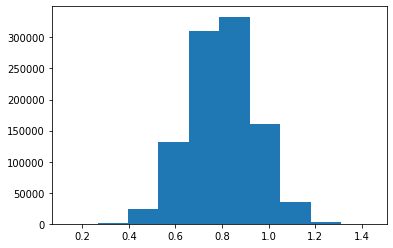

In [1]:
import random

SIMULACIONES = 1000000
resultados_simulacion = []
x_simulados = []


for iteracion in range(1,SIMULACIONES +1,1):
    x_simulado = random.gauss(5,1) # sampleo/muestreo de la variable x que se distribuye de forma normal con media 5 y desviacion 2
    x_simulados.append(x_simulado)
    error = random.gauss(0,0.1) 
    
    # aplicar el modelo para obtener un valor simulado de y
    y = 0.1*x_simulado + 0.3  + error #aplicar el modelo a la variable "simulada"
   
    resultados_simulacion.append(y) #guardar los resultados en una lista para analisis posterior
    
import matplotlib.pyplot as plt

EY = sum(resultados_simulacion)/SIMULACIONES # E(Y) ,esperanza o valor esperado de una variable aleatoria
ingreso_maximo = max(resultados_simulacion)
ingreso_minimo = min(resultados_simulacion)

print("El valor esperado o esperanza de la variable Y es E(Y) =" ,EY)
print("El valor minimo de y es ",ingreso_minimo)
print("El valor maximo de y es ",ingreso_maximo)

plt.hist(resultados_simulacion)
plt.show()

##**Conclusiones:**
1.  Con un valor de interacion relativamente bajo de 1,00: Se observa que el valor esperado E(Y) = 0.785; Ymini = 0.34; ymax= 1.1479 
2.   Con un valor de interacion de 500: Se observa que el valor esperado E(Y) = 0.79358; Ymini = 0.365; ymax= 1.2255
3.   Con un valor de interacion de 1000: Se observa que el valor esperado E(Y) = 0.8063; Ymini = 0.37539; ymax= 1.20758
4.   Con un valor de interacion de 10,000: Se observa que el valor esperado E(Y) = 0.79954; Ymini = 0.24977; ymax= 1.3228
5.   Con un valor de interacion de 50,000: Se observa que el valor esperado E(Y) = 0.7998; Ymini = 0.21818; ymax= 1.4081
6.   Con un valor de interacion de 100,000: Se observa que el valor esperado E(Y) = 0.800; Ymini = 0.1971; ymax= 1.439
7.   Con un valor de interacion de 1,000,000: Se observa que el valor esperado E(Y) = 0.800070; Ymini = 0.134; ymax= 1.4765
**entre mas interaciones realizamos el valor esperado se hace cada vez mas exacto al valor E(y)**


**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [2]:
import numpy as np
a = np.arange(0,0.5,0.1)
b = np.arange(0.5,0.6,0.01)
c = np.arange(0.6,1,0.1)
xs = (a,b,c)
np.hstack(xs)


array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 ])

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [3]:
def mode(x):
  ## tu codigo aqui (~ 3 lineas de codigo):
  x = np.array(x)
  unique, counts = np.unique(x, return_counts=True)
  return print('La moda de x es: ' + str(unique[np.argmax(counts)]))


In [ ]:
mode([1,2,3,4,4,4,4,4,5,6,7,8,9,9,10,10,11,11,11])

La moda de x es: 4


*********
**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.



In [19]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.power(np.sum(np.power(x,2)),1/2) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2])
errores_modelo2 = np.array([0,1,1,2])

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

# elegir el mejor modelo con una condicional(if)
if magnitud(errores_modelo1) < magnitud(errores_modelo2):
  print('El mejor modelo es el modelo 1')
else:
  print('El mejor modelo es el modelo 2')
 

3.1622776601683795
2.449489742783178
El mejor modelo es el modelo 2


**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [24]:
def normalizar(x):
  ## tu codigo aqui (~ 3 linea de codigo)
  return x/magnitud(x)

In [25]:
vector = np.array([10,20,35,30])

magnitud(normalizar(vector))

0.9999999999999999